<a href="https://www.kaggle.com/code/elnahas/english-premier-league-2022?scriptVersionId=106725161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## English Premier League 2022- Analysis & Prediction

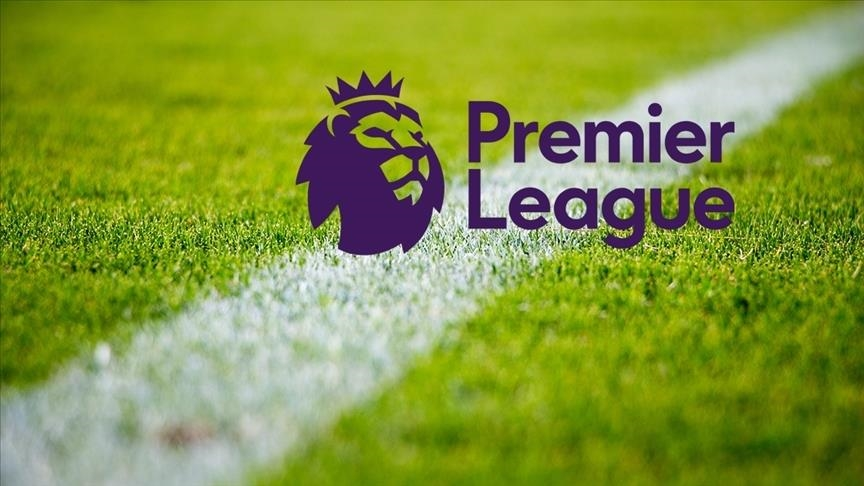

### English Premier League 2022-  Analysis & Prediction 
* Load dataset
* Inspecting the dataset
* Preprocessing the data
* Fitting the RandomForest model and Making predictions
* Imporoving the model 
* Making predictions and evaluating performance
* Display model

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


In [2]:
df = pd.read_csv("/kaggle/input/premier-league-20202022/matches.csv", index_col = 0)
df.shape

(1389, 27)

In [3]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [4]:
df["team"].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

we would expect have 7 teams to have fewer than 70 matches

In [5]:
df[df["team"] == "Liverpool"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


what we see we have data from 2020 to 2021 season for liverpool we are missing data for next season the current season now we know where the missing rows went


In [6]:
df["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

### Data Cleaning 

In [7]:
# CHECK THE TYPE OF THE WHOLE DATA
df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [8]:
# Convert data form object to datatime 
df["date"] = pd.to_datetime(df["date"])
df.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                     float64
pkatt                  float64
season                   int64
team                    object
dtype: object

### Creating predictors 

In [9]:
# Create venue_code column to have the values of venue in form of [0,1] 0= Away, 1= Home
df["venue_code"] = df["venue"].astype("category").cat.codes
df["venue_code"]

1     0
2     1
3     1
4     0
6     1
     ..
38    0
39    1
40    0
41    0
42    1
Name: venue_code, Length: 1389, dtype: int8

In [10]:
# Create opp_code column each opponent now has their own code
df["opp_code"] = df["opponent"].astype("category").cat.codes
df["opp_code"]

1     18
2     15
3      0
4     10
6     17
      ..
38    18
39     6
40     7
41    14
42     4
Name: opp_code, Length: 1389, dtype: int8

In [11]:
# create hour column , remove the colon and minutes from the time column
df["hour"] = df["time"].str.replace(":.+", "", regex = True).astype("int")

In [12]:
# Get number for each day of week
df["day_code"] = df["date"].dt.dayofweek

In [13]:
# create the target column for out target to predict the team is W or L will be converted to be W = 1 , L= 0
df["target"] = (df["result"] == "W").astype("int")
df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


### Train the Model

In [14]:
# RandomForestClassifie
rf = RandomForestClassifier(n_estimators = 40, min_samples_split =10, random_state = 1)

In [15]:
# splitting data into trainset and testset
train = df[df["date"] < "2022-01-01"]
test = df[df["date"] > "2022-01-01"]

In [16]:
# Create the predictor is a list of out predictors columns
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [17]:
# Fit rf model
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=10, n_estimators=40, random_state=1)

In [18]:
# Generate prediction
pred = rf.predict(test[predictors])

#### Accuracy of the model
##### import accuracy_score is a Matric that will basically say if you predicting a win what precentage of time did the team  actually win if you predicted loss what precentage of the time did the team actually loss


In [19]:
# import accuracy_score 
from sklearn.metrics import accuracy_score
acc = accuracy_score(test['target'], pred)
acc

0.6195652173913043

##### check in which situation our accuracy was high versus low in order to do that we first need to create a dataframe this dataframe will combine our actual values and out predicted values 

In [20]:
# Combine the Data
combined = pd.DataFrame(dict(actual = test['target'], prediction = pred ))

##### Create crosstab using Pandas this is just two-way table that will show us when we predicted a zero or a one what actually happened

In [21]:
# Create a Crosstab
pd.crosstab(index = combined["actual"], columns = combined['prediction'])

prediction,0,1
actual,,
0,146,26
1,79,25


##### based on the table above when we prdict 0 we have 146 is true and 79 is false , when we predict 1 we were actually wrong more often than we were right.

##### we gonna use a slightly different matric called precision matric what this going to tell us is predicted a win what the precentage of the time did the team actually win.

In [22]:
# import precision_score
precision_score(test["target"], pred)

0.49019607843137253

#### Improving PRECISION with Rolling Avergae

In [23]:
#Create groupmatches
grouped_matches = df.groupby('team')
group =grouped_matches.get_group("Manchester City")
group


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2021-05-01,12:30,Premier League,Matchweek 34,Sat,Away,W,2.0,0.0,Crystal Palace,...,1.0,0.0,0.0,2021,Manchester City,0,6,12,5,1
56,2021-05-08,17:30,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Chelsea,...,0.0,0.0,1.0,2021,Manchester City,1,5,17,5,0
57,2021-05-14,20:00,Premier League,Matchweek 36,Fri,Away,W,4.0,3.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Manchester City,0,14,20,4,1
58,2021-05-18,19:00,Premier League,Matchweek 37,Tue,Away,L,2.0,3.0,Brighton,...,1.0,0.0,0.0,2021,Manchester City,0,3,19,1,0


#### What we gonna doing is compute rolling averages so we want to say is if we are at match week 4 how did "Manchester City" do in the past three match weeks 

In [24]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed = 'left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [25]:
cols = ["gf","ga","sh","sot","dist","fk","pk","pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

In [26]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [27]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Premier League,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,...,0,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,...,5,1,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Premier League,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,...,6,0,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Premier League,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,...,2,1,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


#### We added all the extra Columns

In [28]:
# we apply it for all the teams
df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))

In [29]:
# Display df_rolling
df_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

In [30]:
# We drop the extra index level
df_rolling = df_rolling.droplevel('team')

In [31]:
df_rolling 

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [32]:
# Get the unique index because many values are repeated
df_rolling.index = range(df_rolling.shape[0])

In [33]:
df_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


### predicting our Model with the new predictors

In [34]:
def make_predictions(data, predictors):
    train = data[data['date'] < '2022-01-01']
    test = data[data['date'] > '2022-01-01']
    rf.fit(train[predictors],train['target'])
    pred = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted = pred), index = test.index)
    precision = precision_score(test['target'], pred)
    return combined, precision

In [35]:
combined, precision = make_predictions(df_rolling, predictors + new_cols)

In [36]:
precision

0.625

### We have imporved our precision quite a bit so we went from 0.49 to 0.625

In [37]:
combined

,actual,predicted
55,0,1
56,1,0
57,1,0
58,1,1
59,1,1
...,...,...
1312,1,0
1313,0,0
1314,1,0
1315,0,0


In [38]:
# add team neams to combined 
combined = combined.merge(df_rolling[["date","team","opponent","result"]], left_index = True, right_index= True)

In [39]:
# check combined now 
combined

,actual,predicted,date,team,opponent,result
55,0,1,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L


### Combining Home and Away Predictions

In [40]:
# create mapping func to rename some teams name 
class MissingDict(dict):
    __missimg__ = lambda self, key:key
    
map_values = {"Wolverhampton Wanderers":"Wolves",
             "Manchester United": "Manchester Utd",
             "Newcastel United":"Newcastel Utd",
             "Tottenham Hostspur":"Tottenham",
             "West Ham United":"West Ham",
             "Brighton and Hove Albion":"Brighton"} 
mapping = MissingDict(**map_values)


In [41]:
# Get the same team name like opponent
combined["new_team"] = combined["team"].map(mapping)

In [42]:
# Merging the dataframe with itself
merged = combined.merge(combined, left_on = ["date", "new_team"], right_on = ["date", "opponent"])

In [43]:
# check Merged
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,1,0,2022-01-02,Brighton and Hove Albion,Everton,W,Brighton,0,0,Everton,Brighton,L,NaN
1,0,0,2022-01-14,Brighton and Hove Albion,Crystal Palace,D,Brighton,0,0,Crystal Palace,Brighton,D,NaN
2,0,0,2022-01-18,Brighton and Hove Albion,Chelsea,D,Brighton,0,0,Chelsea,Brighton,D,NaN
3,0,0,2022-01-23,Brighton and Hove Albion,Leicester City,D,Brighton,0,0,Leicester City,Brighton,D,NaN
4,1,0,2022-02-12,Brighton and Hove Albion,Watford,W,Brighton,0,0,Watford,Brighton,L,NaN
5,0,0,2022-02-15,Brighton and Hove Albion,Manchester Utd,L,Brighton,1,1,Manchester United,Brighton,W,Manchester Utd
6,0,0,2022-02-19,Brighton and Hove Albion,Burnley,L,Brighton,1,0,Burnley,Brighton,W,NaN
7,0,0,2022-02-26,Brighton and Hove Albion,Aston Villa,L,Brighton,1,0,Aston Villa,Brighton,W,NaN
8,0,0,2022-03-05,Brighton and Hove Albion,Newcastle Utd,L,Brighton,1,1,Newcastle United,Brighton,W,NaN
9,0,0,2022-03-16,Brighton and Hove Albion,Tottenham,L,Brighton,1,0,Tottenham Hotspur,Brighton,W,NaN
